### **Week 3**

**DATASET** <br>
*   Download the **MBA dataset** from Elearn
*   Upload the dataset to your own Github
*   Import the dataset using URL from your Github


<br>

**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [1]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

1. display 5 columns from dataset

In [2]:
#1
df = pd.read_csv(r'https://raw.githubusercontent.com/BChristoper/MBA/refs/heads/main/MBA.csv')
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [3]:
#2
df.info()
#conclusion
# What i can conclude is there are 10 columns, there are 1 bool, 3 float, 1 interger 64 and 5 Object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [4]:
#3a
admission = df['admission'].value_counts(dropna=False)
print(admission)


admission
NaN         5194
Admit        900
Waitlist     100
Name: count, dtype: int64


In [5]:
#3b
race = df['race'].value_counts(dropna=False)
print(race)

race
NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [6]:
#4
df['admission'].fillna("deny", inplace=True)
df['race'].fillna("other", inplace=True)

C:\Users\bryan\AppData\Local\Temp\ipykernel_17552\3628299042.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admission'].fillna("deny", inplace=True)
C:\Users\bryan\AppData\Local\Temp\ipykernel_17552\3628299042.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

5. recheck missing value

In [7]:
#5
df.isnull().sum()

application_id    0
gender            0
international     0
gpa               0
major             0
race              0
gmat              0
work_exp          0
work_industry     0
admission         0
dtype: int64

6. drop application_id column

In [8]:
# 6
df.drop('application_id', axis=1, inplace=True)


7. show describe column and conclude what the insight is from that column

In [9]:
#7
describe_df = df.describe()

describe_df
#conclusion


,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

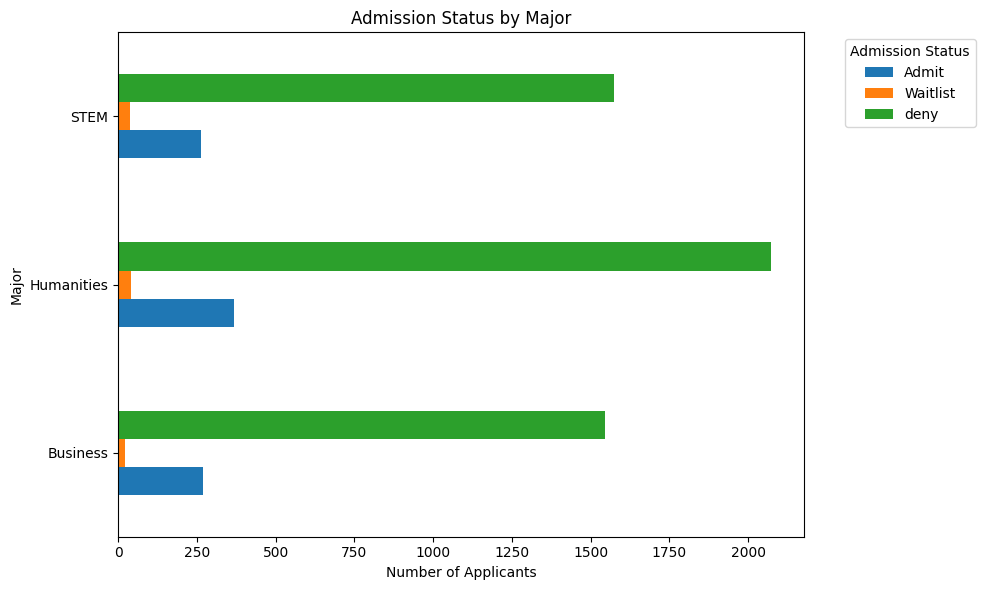

In [10]:
#8


admission_status = df.groupby(['major', 'admission']).size().unstack()

admission_status.plot(kind='barh', stacked=False, figsize=(10,6))

plt.title('Admission Status by Major')
plt.xlabel('Number of Applicants')
plt.ylabel('Major')
plt.legend(title='Admission Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#between STEM Humanities and Business there are a lot that got denied and humanities got the most denial, and also the most admition.


9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

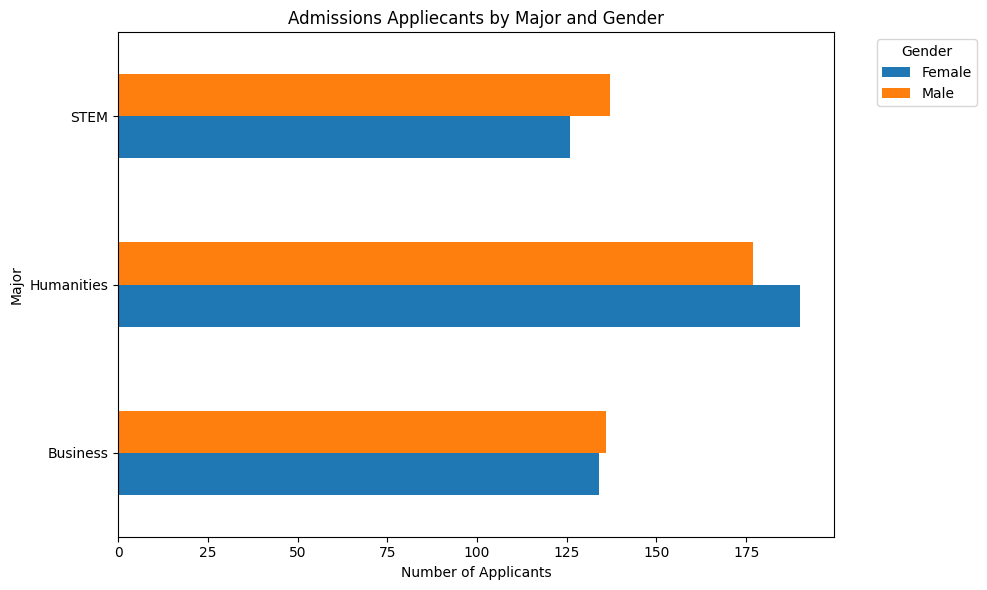

In [11]:
#9

Major_Admition_Gender = df[df['admission'] == 'Admit']

Gender = Major_Admition_Gender.groupby(['major', 'gender'])['gender'].count().unstack()

Gender.plot(kind='barh', stacked=False, figsize=(10,6))


# Adding labels and title to the plot
plt.title('Admissions Appliecants by Major and Gender')
plt.xlabel('Number of Applicants')
plt.ylabel('Major')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()


10. create your own insightful visualization and explain it in at least 2 sentences

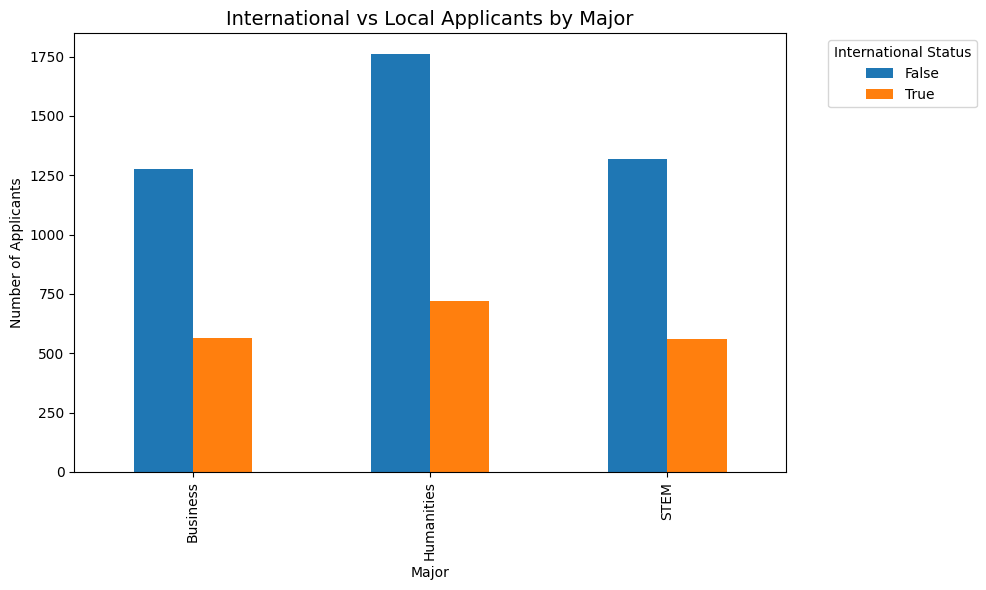

In [12]:
#10
internationalvslocaldata = df.groupby(['major', 'international']).size().unstack()

internationalvslocaldata.plot(kind='bar', stacked=False, figsize=(10,6))

plt.title('International vs Local Applicants by Major', fontsize=14)
plt.xlabel('Major')
plt.ylabel('Number of Applicants')
plt.legend(title='International Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#For this visualization im comparing between International and Local Applicants by Majors, The insight i get is there are a more local applicants than international applicants in all mahjor.

11. create your own insightful visualization and explain it in at least 2 sentences

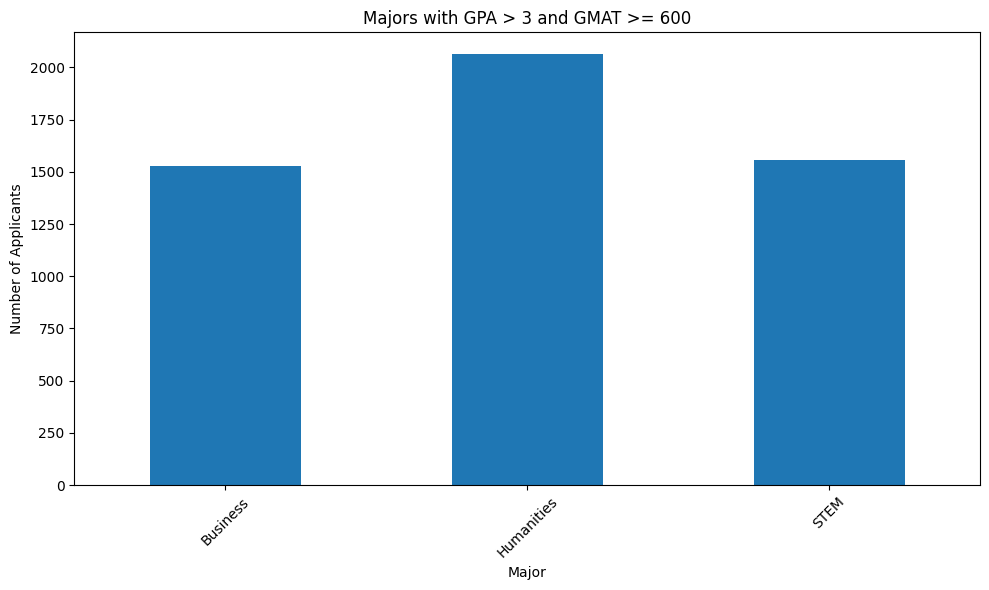

In [13]:
#11
filtered_data = df[(df['gpa'] > 3) & (df['gmat'] >= 600)]
gpa_gmat_by_major = filtered_data.groupby('major').size()

plt.figure(figsize=(10, 6))
gpa_gmat_by_major.plot(kind='bar')

plt.title('Majors with GPA > 3 and GMAT >= 600')
plt.xlabel('Major')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

#This visualization indicates the major with gpa more than 3 and GMAT more than 600. And Business and STEM have a more lower amount of people with stronger academic profiles

12. encode categorical columns and display the results

In [14]:
#12
df_encode = df
df_encode['race'] = df_encode['race'].replace("other", "Other")

label_encoders = {}

for column in ['gender', 'international', 'major', 'race', 'work_industry']:
    le = LabelEncoder()
    df_encode[column] = le.fit_transform(df_encode[column])
    label_encoders[column] = le
    
df_encode.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,Admit
1,1,0,3.28,1,1,680.0,5.0,6,deny
2,0,1,3.30,0,3,710.0,5.0,13,Admit
3,1,0,3.47,2,1,690.0,6.0,13,deny
4,1,0,3.35,2,2,590.0,5.0,1,deny


In [15]:
# Encode the admission column
label_encoders = {}

for column in ['admission']:
    le = LabelEncoder()
    df_encode[column] = le.fit_transform(df_encode[column])
    label_encoders[column] = le
    
df_encode.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,0
1,1,0,3.28,1,1,680.0,5.0,6,2
2,0,1,3.30,0,3,710.0,5.0,13,0
3,1,0,3.47,2,1,690.0,6.0,13,2
4,1,0,3.35,2,2,590.0,5.0,1,2


13. create a heatmap to see the correlation and explain the conclusion

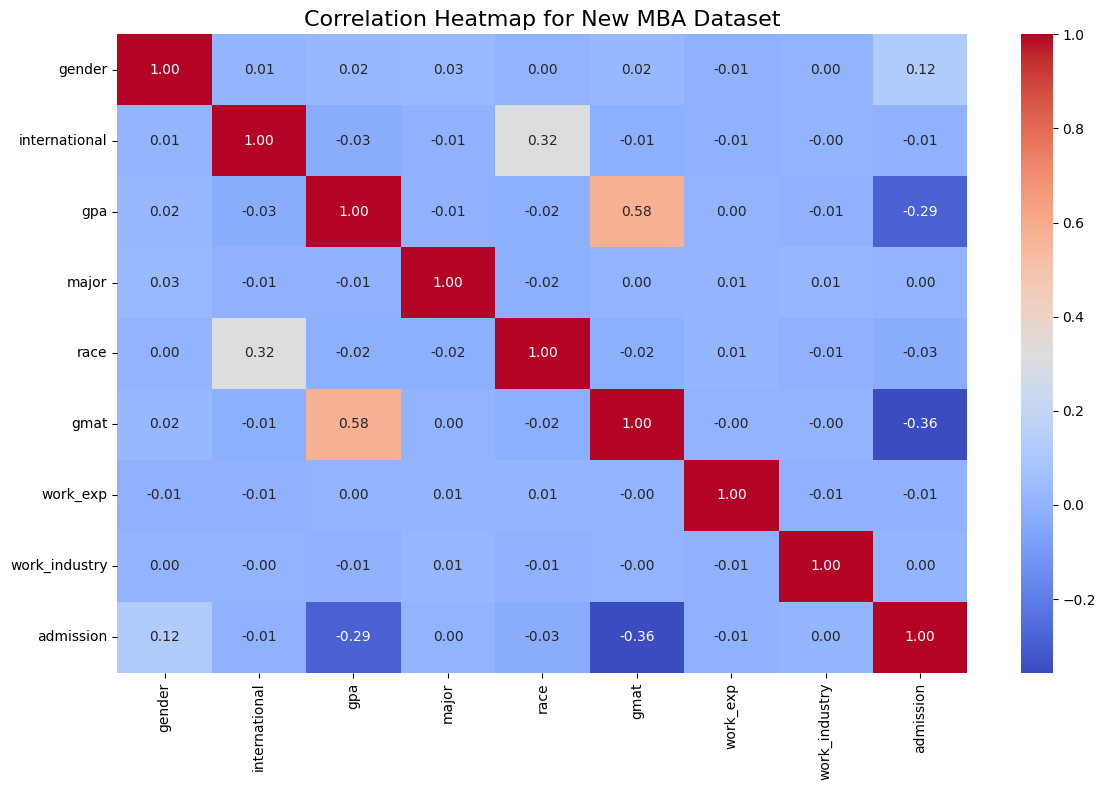

In [16]:
#13
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
import seaborn as sns

df['race'] = df['race'].fillna('Other')
for column in ['gender', 'international', 'major', 'race', 'work_industry', 'admission']:
    df[column] = label_encoder.fit_transform(df[column])
plt.figure(figsize=(12, 8))
correlation_matrix_new = df.corr()
sns.heatmap(correlation_matrix_new, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for New MBA Dataset', fontsize=16)
plt.tight_layout()
plt.show()

#Conclusion


**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [17]:


# Preparing the features and target variable
X = df.drop(columns=['admission'])  # Features
y = df['admission']  # Target variable

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Training the model
dt_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = dt_classifier.predict(X_test)

accuracy = dt_classifier.score(X_test, y_test)

# Evaluating the model

print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 78.77%


In [18]:

average_gpa = df['gpa'].mean()

lisa_data = {
    'gender': 'Female', 
    'international': 'False', 
    'gpa': average_gpa, 
    'major': 'Entrepreneurship',
    'race': 'Asian',
    'gmat': 580,
    'work_exp': 2,
    'work_industry': 'Finance'
}


lisa_df = pd.DataFrame([lisa_data])

for column in ['gender', 'international', 'major', 'race', 'work_industry']:
    le = LabelEncoder()
    lisa_df[column] = le.fit_transform(lisa_df[column])
    label_encoders[column] = le
        
lisa_prediction = dt_classifier.predict(lisa_df)

prediction_label = "Admit" if lisa_prediction[0] == "Admit" else "Deny"
print(f'Lisa will be predicted to: {prediction_label}')

Lisa will be predicted to: Deny
